# 주성분 분석(PCA)
- 고차원 데이터가 주어지면 점들 간의 관계를 시각화하고 데이터의 주분산을 이해하고 **직관적 차원**을 이해하기 위해 PCA를 적용하는 것으로 시작
- 비지도 알고리즘 중 가장 광범위하게 사용
- 기본적으로 차원 축소 알고리즘이지만 노이즈 필터링과 특징 추출 및 특징 공학 등에서도 유용하게 사용

### **다만**
- PCA는 데이터의 이상치에 의해 심하게 영향을 받는 경향이 있음

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

digits = load_digits() # 8x8픽셀 이미지
print(digits.data.shape)

# 64차원에서 2차원으로 축소
pca = PCA(2) 
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 64)
(1797, 2)


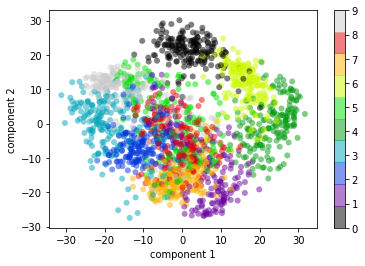

In [3]:
# 긱 점의 첫 두 개의 주성분을 플로팅
plt.scatter(projected[:, 0], projected[:, 1],
            c = digits.target, edgecolor = 'none', alpha = 0.5,
            cmap = plt.cm.get_cmap('nipy_spectral', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

Text(0, 0.5, 'cumulative explained variance')

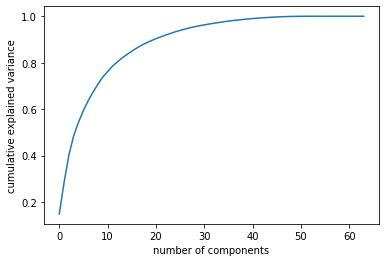

In [4]:
# 성분의 개수 선택_ 누적 설명 분산 비율을 보고 결정
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

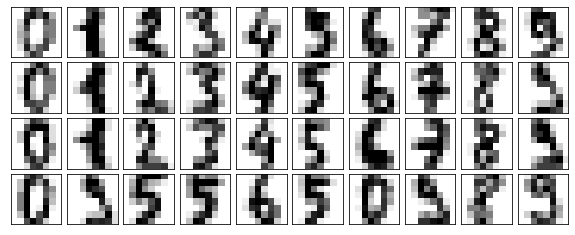

In [7]:
# 노이즈 필터링
# 노이즈의 영향보다 훨씬 더 큰 분산을 가지는 성분이라면 상대저긍로 노이즈에 영향을 받지 않는다는 개념
# 즉, 주성분의 가장 큰 부분집합만 사용해 데이터를 재구성하면 우선적으로 신호는 유지하고 노이즈는 걸러줌

# 노이즈가 없는 데이터
def plot_digits(data):
  fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                           subplot_kw={'xticks' : [], 'yticks' : []},
                           gridspec_kw=dict(hspace=0.1, wspace=0.1))
  
  for i, ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(8, 8),
              cmap='binary', interpolation='nearest',
              clim=(0,16))
    
plot_digits(digits.data)

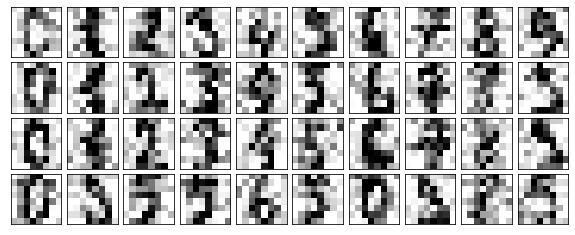

In [8]:
# 노이즈 섞인 데이터세트를 만들기 위해 임의의 노이즈를 추가
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [19]:
# PCA가 분산의 50%를 보존하는 조건 노이즈가 썩인 데이터 훈련
pca = PCA(0.50).fit(noisy)
pca.n_components_ 

# 분산의 50%는 12개의 주성분에 달한다

12

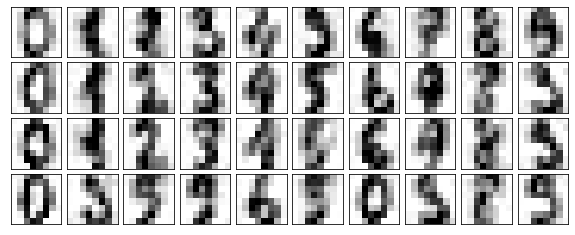

In [20]:
# PCA는 신호를 보존하고 노이즈를 걸러내는 특성이 있기 때문에
# 특징 선택 루틴으로 사용하기에 매우 유용
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [21]:
# 예제 : 고유얼굴 / 와일드 데이터세트의 레이블을 가진 얼굴 데이터를 사용
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [23]:
from sklearn.decomposition import PCA
pca = PCA(150) # 첫 150개의 성분 확인
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

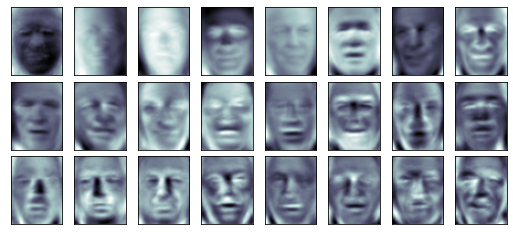

In [27]:
fig, axes = plt.subplots(3, 8, figsize=(9,4),
                         subplot_kw={'xticks' : [], 'yticks' : []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

# 처음 몇 개 주성분들을 고유벡터, 이미지들을 고유얼굴이라고도 함
# 처음 몇 개의 고유얼굴은 얼굴을 비추는 빛의 각도과 관련 있어 보이고,
# 그 이후의 주벡터는 눈, 코, 입 같은 특징을 잡아낸 것으로 보인다.

Text(0, 0.5, 'cumulative explained variance')

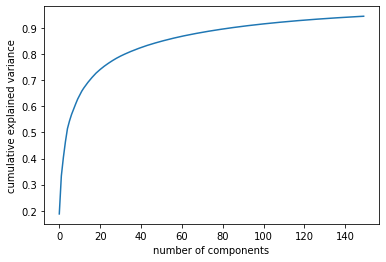

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, '150-dim\nreconstruction')

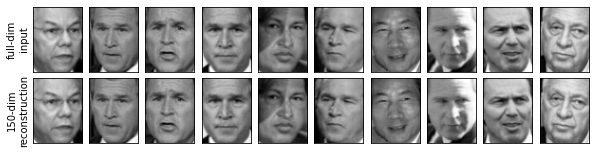

In [32]:
# 성분과 사영된 얼굴 계산
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# 결과
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                      subplot_kw={'xticks' : [], 'yticks' : []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
  ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
  ax[1, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')

# 위 줄은 입력 이미지를 보여주고 아래 줄은 3000개의 초기 특징 중 150개만으로 재구성한 이미지를 보여줌
# 150개로 축소한 이미지는 눈으로 인식할 수 있을 만큼 충분한 정보를 포함하고 있음
# 효율적인 분류가 가능

# 다양체 학습
- 비선형적인 관계가 있을 떄는 비지도 추정방식인 **다양체 학습** 방식을 고려
- 예를 들어 다양체 학습 알고리즘은 종이를 3차원 공간을 채우도록 뒤틀어 놓았더라도 종이가 가진 기본적인 2차원 속성에 대해 학습하려고 함

# 종류
- 다차원 척도법(MDS)
- 국부 선형 임베딩(LLE)
- 등거리 사상(Isomap)

# 다양체 학습 VS PCA
- PCA보다 우위에 있는 유일한 장점 : 비선형 관계를 보존할 수 있음
  - 그래서 보통 PCA로 데이터 확인 후 다양체 학습으로 탐색

In [33]:
# 예제 : 얼굴 데이터에 아이소맵(등거리 사상) 적용
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape # 2914차원 공간의 데이터 점으로 생각

(2370, 2914)

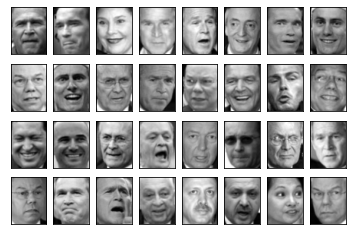

In [35]:
fig, axes = plt.subplots(4, 8, subplot_kw={'xticks' : [], 'yticks' : []})
for i, ax in enumerate(axes.flat):
  ax.imshow(faces.images[i].reshape(62, 47), cmap='gray')

Text(0, 0.5, 'cumulative explained variance')

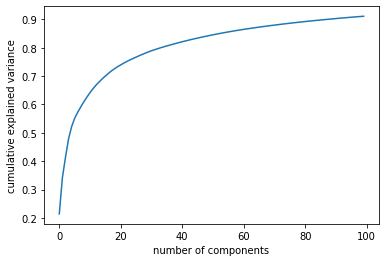

In [36]:
from sklearn.decomposition import PCA
model = PCA(100).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# 분산의 90%를 보존하기 위해서 거의 100개의 성분이 필요하단걸 알 수 있음

In [37]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(2370, 2)

In [55]:
# 결과는 모든 입력 이미지의 2차원 사영 형태로 나옴
# 사영의 위치에 이미지 섬네일을 출력하는 함수를 정의
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None, thumb_frac=0.05, cmap='gray'):
  ax = ax or plt.gca()

  proj = model.fit_transform(data)
  ax.plot(proj[:, 0], proj[:, 1], '.k')

  if images is not None:  
    min_dist_2 = (thumb_frac * max(proj.max(0) - [proj.min(0)])) ** 2
    shown_images = np.array([2 * proj.max(0)])
    for i in range(data.shape[0]):
      dist = np.sum((proj[i]-shown_images)**2, 1)
      if np.min(dist) < min_dist_2 :
        continue

      shown_images = np.vstack([shown_images, proj[i]])
      imagebox = offsetbox.AnnotationBbox(
         offsetbox.OffsetImage(images[i], cmap=cmap), proj[i]
      )
      ax.add_artist(imagebox)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


ValueError: ignored

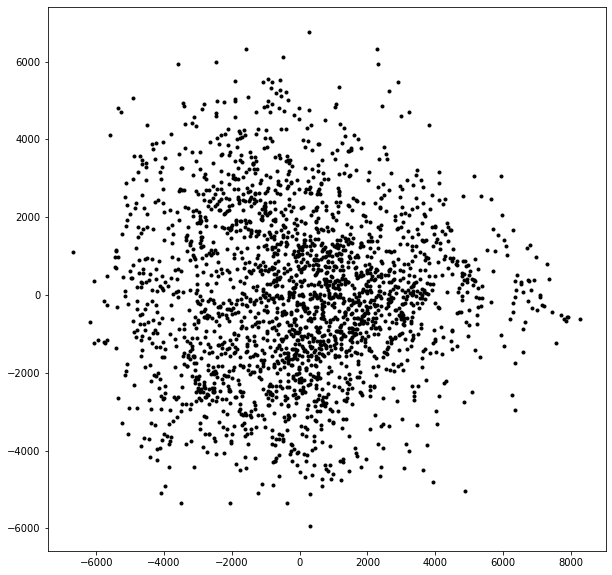

In [56]:
# 뭐가 문제일까....
fig, ax = plt.subplots(figsize=(10,10))
plot_components(faces.data, model=Isomap(n_components=2), images=faces.images[:,::2,::2])